# Feedforward Neural Network on MNIST Grayscale
### By Tomas Ward
Building a simple feedforward neural network (FNN) to classify digits from the grayscale MNIST dataset.


In [162]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential
from keras.layers import Flatten, Dense, Dropout
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

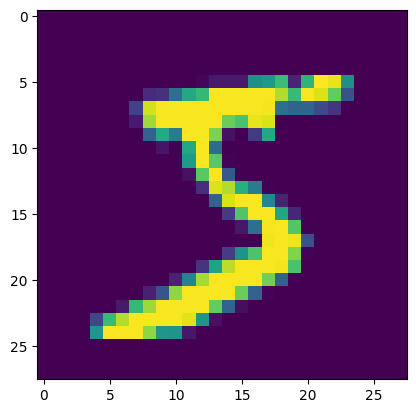

In [163]:
# Load data
(mnist_x_train, mnist_y_train), (mnist_x_test, mnist_y_test) = mnist.load_data()
plt.imshow(mnist_x_train[0])

In [164]:
# Data Processing
# Normalize the images to [0, 1] range
mnist_x_train = mnist_x_train.astype('float32') / 255.0
mnist_x_test = mnist_x_test.astype('float32') / 255.0

# Convert labels to categorical format
mnist_y_train = to_categorical(mnist_y_train, num_classes=10)
mnist_y_test = to_categorical(mnist_y_test, num_classes=10)

In [165]:
# Constants
activation_dense = "relu"
optimizer = Adam(learning_rate=0.003)

In [166]:
# Create the model architecture
fnn_model = Sequential()

# Flatten the input images from Matrix to Vector form, so they can be understood by a Dense Layer.
fnn_model.add(Flatten(input_shape=(28, 28)))

# Hidden layers with ReLU activation function for non-linearity 
fnn_model.add(Dense(100,activation_dense))
fnn_model.add(Dropout(rate=0.2)) # To prevent overfitting
fnn_model.add(Dense(100,activation_dense))
fnn_model.add(Dense(50,activation_dense))

# Output Layer with 10 neurons to match the 0-9 digit classification. 
# Softmax used to get a probability distribution over the classification results.
fnn_model.add(Dense(10,activation='softmax'))

# Build and compile the model
fnn_model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
fnn_model.summary()             

/Users/tomasward/Desktop/Dev/anaconda3/envs/deep-learning/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 94,160 (367.81 KB)

 Trainable params: 94,160 (367.81 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Plot Losses callback
import matplotlib.pyplot as plt
from IPython.display import clear_output
import keras


class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []

        self.fig = plt.figure()

        self.logs = []

    def on_epoch_end(self, epoch, logs={}):

        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get("loss"))
        self.val_losses.append(logs.get("val_loss"))
        self.i += 1

        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val-loss")
        plt.legend()
        plt.show()


plot_losses = PlotLosses()

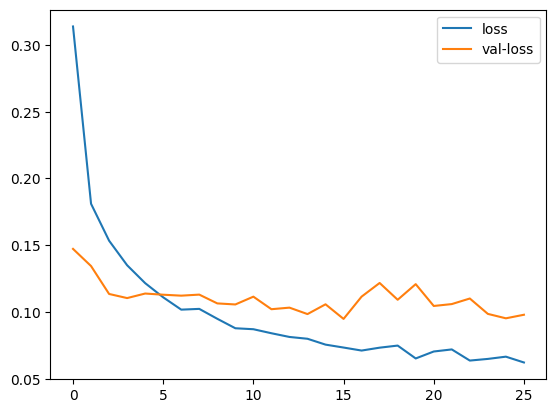

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 592us/step - accuracy: 0.9817 - loss: 0.0610 - val_accuracy: 0.9753 - val_loss: 0.0980


In [168]:
from tensorflow.keras.callbacks import EarlyStopping

# Fit the model, plotting the loss in real time
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = fnn_model.fit(np.array(mnist_x_train), np.array(mnist_y_train), epochs=100,validation_split = 0.2, callbacks=[plot_losses, early_stopping])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 282us/step


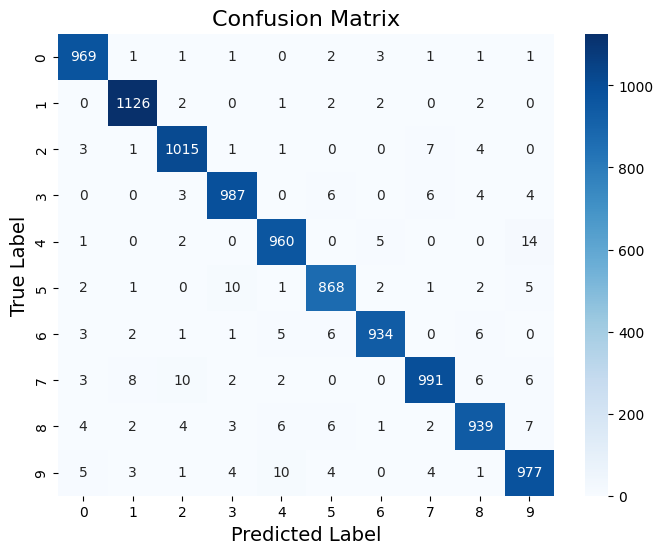

In [169]:
# Evaluate the model with the test set
pred_y=fnn_model.predict(np.array(mnist_x_test))
pred_y=pred_y = np.argmax(pred_y, axis=1)
mnist_y_test_original = np.argmax(mnist_y_test, axis=1)

# Compute the confusion matrix to monitor model performance
m = confusion_matrix(mnist_y_test_original, pred_y)


plt.figure(figsize=(8, 6))
sns.heatmap(m, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.show()

As we can see, the diagonals represent the True Positives and the rest of the blocks are false positives/negatives. Our model did very well, but let's check it with numbers...

In [ ]:
metrics = fnn_model.evaluate(np.array(mnist_x_test), np.array(mnist_y_test))

print(f"Loss: {round(metrics[0],2)}")
print(f"Accuracy: {round(metrics[1] * 100, 2)}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 246us/step - accuracy: 0.9715 - loss: 0.1173
Loss: 0.1
Accuracy: 97.66%


## Random image reader
This codeblock picks a random image from the MNIST Grayscale test set and runs it through the model

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


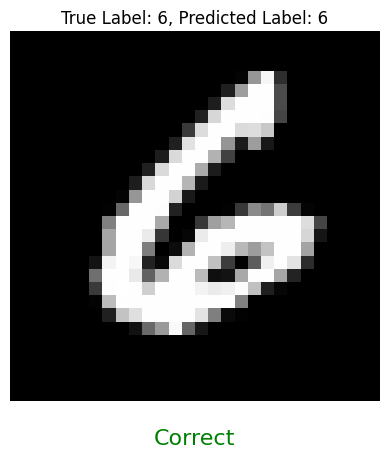

In [181]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Pick a random index from the MNIST test set
random_index = random.randint(0, mnist_x_test.shape[0] - 1)
random_image = mnist_x_test[random_index]
true_label = np.argmax(mnist_y_test[random_index])  # Convert one-hot to label


random_image_input = np.expand_dims(random_image, axis=0) 

# Run the model prediction
predicted_probs = fnn_model.predict(random_image_input)
predicted_label = np.argmax(predicted_probs, axis=1)[0]


is_correct = (true_label == predicted_label)

# Display the image
plt.imshow(random_image.squeeze(), cmap='gray')  # Remove channel dimension for display
color = 'green' if is_correct else 'red'
status_text = 'Correct' if is_correct else 'Incorrect'
plt.title(f'True Label: {true_label}, Predicted Label: {predicted_label}')
plt.text(0.5, -0.1, status_text, ha='center', va='center', fontsize=16, color=color, transform=plt.gca().transAxes)
plt.axis('off') 
plt.show()
